## Observations and Insights

1. Of the four most promising drug regimens, Ceftamin was the most consistent since it had the smallest range of final tumor sizes.
2. While Ramicane and Capomulin had the smallest final tumor sizes, they were also the least consistent regimens since they had the largest range of final tumor sizes amongst the top four regimens.
3. Average mouse weight and average tumor volume were closely correlated for the Capomulin regimen.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary statistics

In [2]:
#list of regimens
regimens = merged_df["Drug Regimen"].unique()
regimens

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


capomulin_df = merged_df.loc[merged_df["Drug Regimen"]== "Capomulin"]
ketapril_df = merged_df.loc[merged_df["Drug Regimen"]== "Ketapril"]
naftisol_df = merged_df.loc[merged_df["Drug Regimen"]== "Naftisol"]
infubinol_df = merged_df.loc[merged_df["Drug Regimen"]== "Infubinol"]
stelasyn_df = merged_df.loc[merged_df["Drug Regimen"]== "Stelasyn"]
ramicane_df = merged_df.loc[merged_df["Drug Regimen"]== "Ramicane"]
propriva_df = merged_df.loc[merged_df["Drug Regimen"]== "Propriva"]
zoniferol_df = merged_df.loc[merged_df["Drug Regimen"]== "Zoniferol"]
placebo_df = merged_df.loc[merged_df["Drug Regimen"]== "Placebo"]
ceftamin_df = merged_df.loc[merged_df["Drug Regimen"]== "Ceftamin"]

DrugDFs=[capomulin_df, ketapril_df,naftisol_df,infubinol_df,stelasyn_df,ramicane_df,propriva_df,zoniferol_df,placebo_df,ceftamin_df]

TumorMeans = []
TumorMedians = []
TumorVar = []
TumorStanDev = []
TumorSEMs = []

for df in DrugDFs:
    TumorMeans.append(np.mean(df["Tumor Volume (mm3)"]))
    TumorMedians.append(np.median(df["Tumor Volume (mm3)"]))  
    TumorVar.append(np.var(df["Tumor Volume (mm3)"], ddof=0))
    TumorStanDev.append(np.std(df["Tumor Volume (mm3)"], ddof=0))
    TumorSEMs.append(st.sem(df["Tumor Volume (mm3)"]))

SummaryStatsTable = pd.DataFrame({"Drug Regimen": regimens, 
                                  "Tumor Volume Mean": TumorMeans,
                                  "Tumor Volume Median": TumorMedians,
                                  "Variance": TumorVar,
                                  "Standard Deviation": TumorStanDev,
                                  "Standard Error": TumorSEMs})
IndexedSummaryStatsTable = SummaryStatsTable.set_index("Drug Regimen")
IndexedSummaryStatsTable

,Tumor Volume Mean,Tumor Volume Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Propriva,52.322552,50.854632,42.088020,6.487528,0.512884
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331


## Bar plots

Text(0, 0.5, 'Data Points')

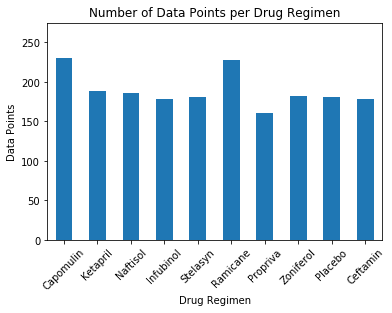

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

IndexedSummaryStatsTable["Data Points"] = [len(data) for data in DrugDFs]

IndexedSummaryStatsTable["Data Points"].plot(x="Drug Regimen", y="Data Points", kind="bar",
                                      title = "Number of Data Points per Drug Regimen", ylim = (0,275),
                                        rot = 45).set_ylabel("Data Points")
    

Text(0, 0.5, 'Data Points')

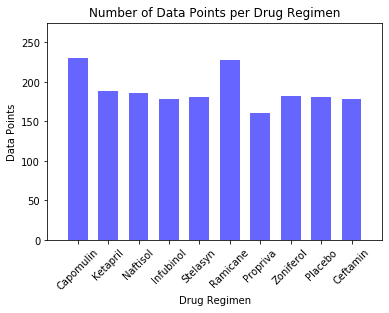

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = SummaryStatsTable["Drug Regimen"]
y_axis = IndexedSummaryStatsTable["Data Points"]

plt.bar(x_axis, y_axis,width=0.65, color='b', alpha=0.6, align="center")
plt.xticks(rotation=45)
plt.xlim(-1, len(x_axis))
plt.ylim(0, 275)
plt.title("Number of Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

## Pie plots

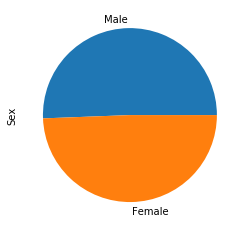

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
SexDistribution = merged_df["Sex"].value_counts()
Pie = SexDistribution.plot.pie()
Pie

([<matplotlib.patches.Wedge at 0x202edf28cf8>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')])

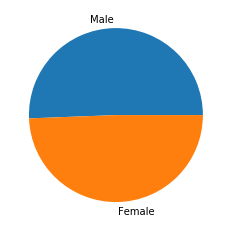

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


Pie2 = plt.pie(SexDistribution, labels = ["Male", "Female"])
Pie2

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

#four most promising treatments
average_tumors_by_time=merged_df.groupby(["Timepoint", "Drug Regimen"]).mean()
final_tumor_average = average_tumors_by_time.loc[45]
final_tumor_average = final_tumor_average.sort_values(by=["Tumor Volume (mm3)"])
final_tumor_average

,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,
Ramicane,34.955595,1.250000,10.050000,19.300000
Capomulin,36.236114,1.476190,12.809524,19.857143
Ceftamin,64.132421,2.692308,13.538462,27.615385
Infubinol,65.755562,2.111111,18.555556,26.666667
Zoniferol,65.960888,3.071429,13.071429,27.571429
Propriva,66.258529,2.571429,12.142857,27.142857
Placebo,68.084082,3.272727,11.818182,27.727273
Stelasyn,68.438310,1.727273,12.727273,27.545455
Naftisol,69.265506,2.538462,12.230769,27.153846


In [9]:
#final tumor volumes of promising treatments

tumors_by_time=merged_df.groupby(["Timepoint", "Drug Regimen", "Mouse ID"]).sum()
final_tumors = tumors_by_time.loc[45]
promising_final_tumors = final_tumors.loc[["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]]
promising_final_tumors = promising_final_tumors.drop(columns=["Metastatic Sites", "Age_months", "Weight (g)"])
promising_final_tumors

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             g288               37.074024
             g316               40.159220
             i557               47.685963
...                                   ...
Ramicane     q597               45.220869
             r811               37.225650
             s508               30.276232
             u196               40.667713
             z578               30.638696

[63 rows x 1 columns]

In [10]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
ramicane_mice = promising_final_tumors.loc["Ramicane"]
capomulin_mice = promising_final_tumors.loc["Capomulin"]
ceftamin_mice = promising_final_tumors.loc["Ceftamin"]
infubinol_mice = promising_final_tumors.loc["Infubinol"]

ramicane_tumors = ramicane_mice["Tumor Volume (mm3)"]
capomulin_tumors = capomulin_mice["Tumor Volume (mm3)"]
ceftamin_tumors = ceftamin_mice["Tumor Volume (mm3)"]
infubinol_tumors = infubinol_mice["Tumor Volume (mm3)"]

#quartiles
ramicane_q = ramicane_tumors.quantile([.25,.5,.75])
capomulin_q = capomulin_tumors.quantile([.25,.5,.75])
ceftamin_q = ceftamin_tumors.quantile([.25,.5,.75])
infubinol_q = infubinol_tumors.quantile([.25,.5,.75])
#lower qs
ramicane_lower = ramicane_q[.25]
capomulin_lower = capomulin_q[.25]
ceftamin_lower = ceftamin_q[.25]
infubinol_lower = infubinol_q[.25]
#upper qs
ramicane_upper = ramicane_q[.75]
capomulin_upper = capomulin_q[.75]
ceftamin_upper = ceftamin_q[.75]
infubinol_upper = infubinol_q[.75]
#iqrs
ramicane_iqr = ramicane_upper - ramicane_lower
capomulin_iqr = capomulin_upper - capomulin_lower
ceftamin_iqr = ceftamin_upper - ceftamin_lower
infubinol_iqr = infubinol_upper - infubinol_lower
#lower bounds
ramicane_low_bound = ramicane_lower - (1.5*ramicane_iqr)
capomulin_low_bound = capomulin_lower - (1.5*capomulin_iqr)
ceftamin_low_bound = ceftamin_lower - (1.5*ceftamin_iqr)
infubinol_low_bound = infubinol_lower - (1.5*infubinol_iqr)
#upper bounds
ramicane_up_bound = ramicane_upper + (1.5*ramicane_iqr)
capomulin_up_bound = capomulin_upper + (1.5*capomulin_iqr)
ceftamin_up_bound = ceftamin_upper + (1.5*ceftamin_iqr)
infubinol_up_bound = infubinol_upper + (1.5*infubinol_iqr)

#outliers
ramicane_outliers= [t for t in ramicane_tumors if [(ramicane_tumors < ramicane_low_bound) | (ramicane_tumors > ramicane_up_bound)] == True]
capomulin_outliers= [t for t in capomulin_tumors if [(capomulin_tumors < capomulin_low_bound) | (capomulin_tumors > capomulin_up_bound)] == True]
ceftamin_outliers= [t for t in ceftamin_tumors if [(ceftamin_tumors < ceftamin_low_bound) | (ceftamin_tumors > ceftamin_up_bound)] == True]
infubinol_outliers= [t for t in infubinol_tumors if [(infubinol_tumors < infubinol_low_bound) | (infubinol_tumors > infubinol_up_bound)] == True]

outliers = {"Ramicane": ramicane_outliers, 
            "Capomulin": capomulin_outliers, 
            "Ceftamin": ceftamin_outliers, 
            "Infubinol": infubinol_outliers}
outliers

{'Ramicane': [], 'Capomulin': [], 'Ceftamin': [], 'Infubinol': []}

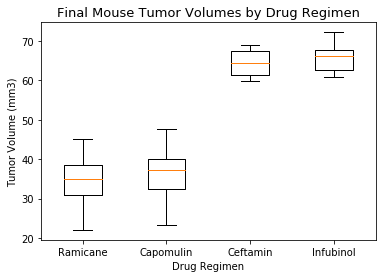

In [83]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data = [ramicane_tumors, capomulin_tumors, ceftamin_tumors, infubinol_tumors]

fig1, ax = plt.subplots()

ax.boxplot(data)

ax.set_title("Final Mouse Tumor Volumes by Drug Regimen", fontsize = 13)
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel("Drug Regimen")
ax.set_xticklabels(["Ramicane", "Capomulin", "Ceftamin", "Infubinol"])
plt.show()

## Line and scatter plots

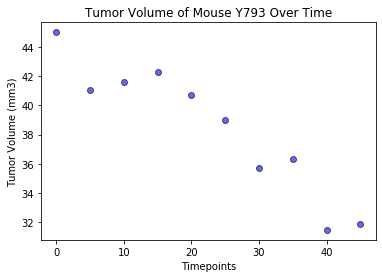

In [82]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_over_time = merged_df.groupby(["Drug Regimen","Mouse ID","Timepoint"]).sum()
mouse_over_time = mouse_over_time.loc["Capomulin"]
mouse_over_time = mouse_over_time.loc["y793"]
mouse_over_time = mouse_over_time.reset_index()
x = mouse_over_time["Timepoint"]
y = mouse_over_time["Tumor Volume (mm3)"]
plt.scatter(x, y, marker = "o", color="b", edgecolors="black", alpha = .6)

plt.title("Tumor Volume of Mouse Y793 Over Time", fontsize = 13)
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [13]:
capomulin_df = capomulin_df.set_index("Mouse ID")

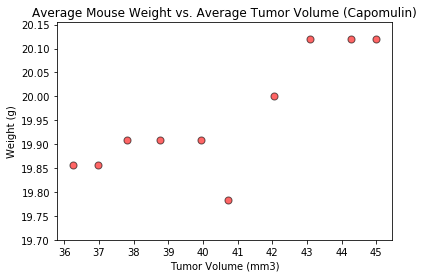

,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Timepoint,,,,
0,45.000000,0.000000,14.040000,20.120000
5,44.266086,0.160000,14.040000,20.120000
10,43.084291,0.320000,14.040000,20.120000
15,42.064317,0.375000,13.666667,20.000000
20,40.716325,0.652174,13.304348,19.782609
25,39.939528,0.818182,13.181818,19.909091
30,38.769339,1.090909,13.181818,19.909091
35,37.816839,1.181818,13.181818,19.909091
40,36.958001,1.380952,12.809524,19.857143


In [76]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capo_mouse_over_time = capomulin_df.groupby(["Timepoint"]).mean()

x_axis = capo_mouse_over_time["Tumor Volume (mm3)"]
y_axis = capo_mouse_over_time["Weight (g)"]
plt.scatter(x_axis, y_axis, marker = "o", color="r", edgecolors="black", alpha = .6, s = 50)
plt.title("Average Mouse Weight vs. Average Tumor Volume (Capomulin)", fontsize = 13)
plt.ylabel("Weight (g)")
plt.xlabel("Tumor Volume (mm3)")
xticks = np.arange(36, 46, 1)
yticks = np.arange(19.7, 20.2, .05)
plt.xticks(xticks)
plt.yticks(yticks)
plt.show()

capo_mouse_over_time

In [80]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation coefficient of Tumor Volume and Weight for the above plot is: {correlation[0]}.")

The correlation coefficient of Tumor Volume and Weight for the above plot is: 0.8207292487213749.


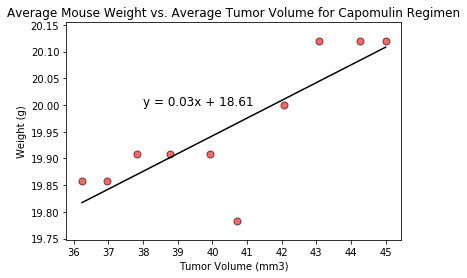

In [81]:
plt.scatter(x_axis, y_axis, marker = "o", color="r", edgecolors="black", alpha = .6, s=50)
plt.title("Average Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", fontsize = 13)
plt.ylabel("Weight (g)")
plt.xlabel("Tumor Volume (mm3)")
xticks = np.arange(36, 46, 1)
yticks = np.arange(19.7, 20.2, .05)
plt.xticks(xticks)
plt.yticks(yticks)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"black")
plt.annotate(line_eq,(38,20),fontsize=12,color="black")
plt.show()